### Carregando biblitecas

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregando dados

In [78]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementação do Thompson Sampling

In [79]:
import random

N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward += reward
    

### Visualização dos resultados

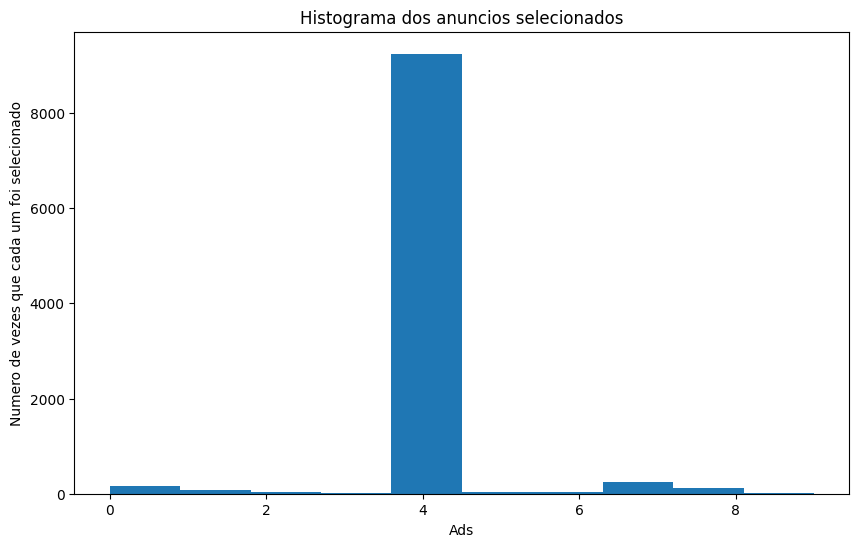

In [80]:
plt.figure(figsize=(10,6))
plt.hist(ads_selected)
plt.title("Histograma dos anuncios selecionados")
plt.xlabel("Ads")
plt.ylabel("Numero de vezes que cada um foi selecionado")
plt.show()